In [1]:
# Step 1 : Importing required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Step 2: Rading the dataset

In [4]:
df = pd.read_csv('insurance.csv')

In [5]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
#checking size of dataset
df.shape

(1338, 7)

In [8]:
#to get datatypes of parameters
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
#checking for any nul values
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [10]:
#checking number of null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
#treating null values

In [12]:
#numerical variables -> replace with mean or median
#categorical variables -> replace with mode

In [13]:
#null values for numerical variable

# df['age'].fillna([df['age'].median(),inplace=True])

In [14]:
#null values for categorical variable

# df['smoker'].fillna([df['smoker'].mode(),inplace=True])

In [15]:
#Step : checking desciptive statistics
# we get description of only numerical variables
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [16]:
#categircal varaible exploration

#cheking number of unique values
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [17]:
df['region'].nunique()

4

In [18]:
#cheking number of each unique fields
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [19]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [20]:
#checking correlation
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [21]:
#correlation with target variable

df.corr()['charges'].sort_values(ascending=False)

charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64

##### Univariate Analysis

C:\Users\Harsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

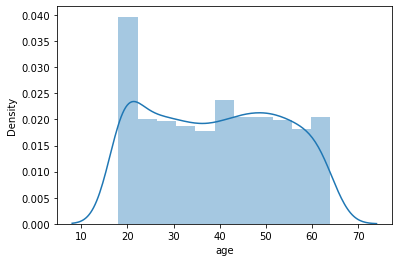

In [22]:
# univariate analysis
sns.distplot(df['age'])

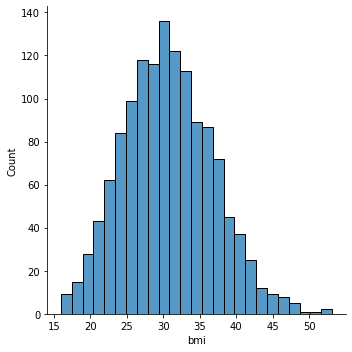

In [23]:
sns.displot(df['bmi'])

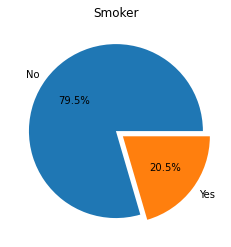

In [24]:
#analysing categorical variables

plt.pie(df['smoker'].value_counts(),[0,0.1],labels=['No','Yes'],autopct='%1.1f%%')
plt.title('Smoker')
plt.show()

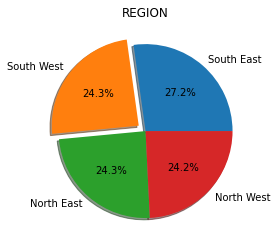

In [25]:
# analysis region
plt.pie(df.region.value_counts(),[0,0.1,0,0],labels=['South East','South West','North East','North West'],autopct='%1.1f%%',shadow=True)
plt.title('REGION')
plt.show()

<AxesSubplot:ylabel='region'>

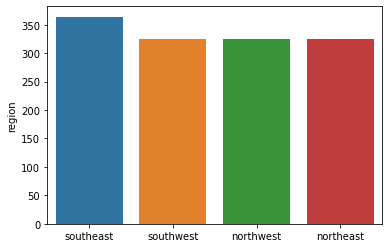

In [26]:
sns.barplot(x = df['region'].value_counts().index, 
           y=df['region'].value_counts())

<AxesSubplot:ylabel='sex'>

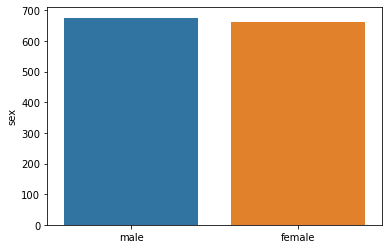

In [27]:
#analysing sex
sns.barplot(x = df['sex'].value_counts().index, 
           y=df['sex'].value_counts())

##### Bivariate Analysis 

<AxesSubplot:xlabel='age', ylabel='charges'>

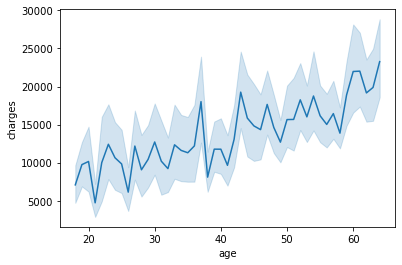

In [28]:
sns.lineplot(x = df['age'],
            y = df['charges'])

<AxesSubplot:xlabel='age', ylabel='charges'>

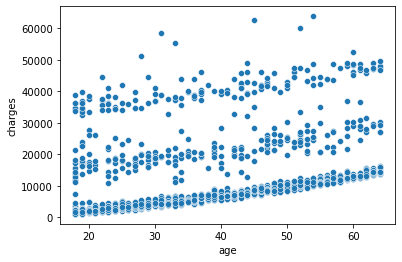

In [29]:
sns.scatterplot(x = df['age'],
            y = df['charges'])

##### Multivariate Analysis 

In [30]:
#sns.pairplot(df)

<AxesSubplot:>

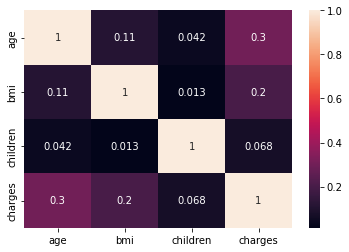

In [31]:
# checking multicollinearity
sns.heatmap(df.corr(),annot=True)

In [32]:
# Detecting Outliers -> BOXPLOT

C:\Users\Harsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

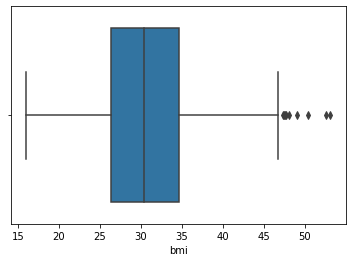

In [33]:
sns.boxplot(df['bmi'])

In [34]:
# treating outliers -> removal method 
#                   1. IQR 
#                   2. Z-score
#                   3. Percentile method

In [35]:
#Oulier treatment by replacement with median

In [36]:
q1 = df['bmi'].quantile(0.25)
q3 = df['bmi'].quantile(0.75)

IQR = q3-q1

print(q1)
print(q3)
print(IQR)

26.29625
34.69375
8.3975


In [37]:
upper_limit = q3 + 1.5*IQR
lower_limit = q1 - 1.5*IQR

In [38]:
upper_limit

47.290000000000006

In [39]:
lower_limit

13.7

In [40]:
df['bmi'].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [41]:
df.median()

C:\Users\Harsh\AppData\Local\Temp/ipykernel_31524/530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


age           39.000
bmi           30.400
children       1.000
charges     9382.033
dtype: float64

In [42]:
df['bmi'].median()


30.4

In [43]:
df['bmi'] = np.where(df['bmi']>upper_limit,30,df['bmi'])

C:\Users\Harsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

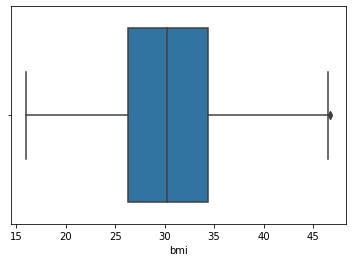

In [44]:
sns.boxplot(df['bmi'])

In [45]:
# Oulier removal - for very big data

C:\Users\Harsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

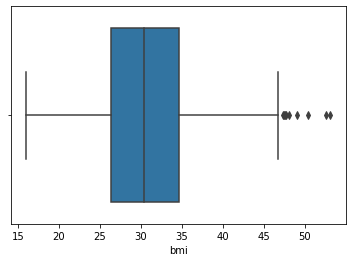

In [46]:
# 1. removing iqr

#q1
#q3
#IQR
#upper
#lower

sns.boxplot(df1['bmi'])

In [47]:
Q1 = df1['bmi'].quantile(0.25)
Q3 = df1['bmi'].quantile(0.75)

iqr = q3-q1

print(Q1)
print(Q3)
print(iqr)

26.29625
34.69375
8.3975


In [48]:
upper_limit1 = Q3 + 1.5*iqr
lower_limit1 = Q1 - 1.5*iqr

In [49]:
upper_limit1

47.290000000000006

In [50]:
lower_limit1

13.7

In [51]:
#df1 = df1(df1['bmi']<upper_limit1)

#### 2. Z-score

In [52]:
from scipy import stats 

C:\Users\Harsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

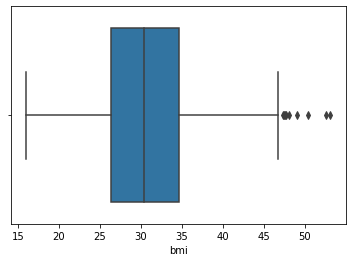

In [53]:
sns.boxplot(df2['bmi'])

In [54]:
df2.shape

(1338, 7)

In [55]:
bmi_zscore = stats.zscore(df2['bmi'])
bmi_zscore

0      -0.453320
1       0.509621
2       0.383307
3      -1.305531
4      -0.292556
          ...   
1333    0.050297
1334    0.206139
1335    1.014878
1336   -0.797813
1337   -0.261388
Name: bmi, Length: 1338, dtype: float64

In [56]:
df_z = df2[np.abs(bmi_zscore)<=3]

C:\Users\Harsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

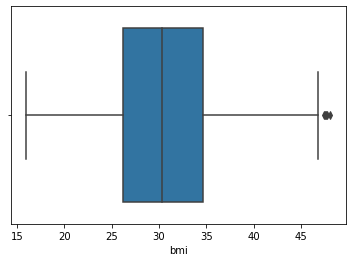

In [57]:
sns.boxplot(df_z['bmi'])

In [58]:
df_z.shape

(1334, 7)

#### 3. Percentile

C:\Users\Harsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

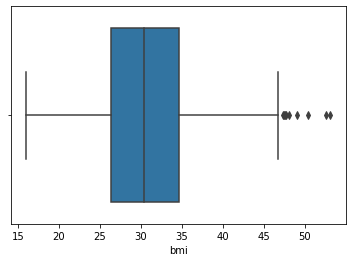

In [59]:
sns.boxplot(df3.bmi)

In [60]:
p99 = df3.bmi.quantile(0.99)
p99

46.40789999999996

### Trasforming Data - Categorical to Numerical

#### 1. Label Encoding

In [61]:
from sklearn.preprocessing import LabelEncoder

In [62]:
le = LabelEncoder()

In [63]:
df.sex = le.fit_transform(df.sex)

In [64]:
df.smoker = le.fit_transform(df.smoker)

In [65]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


#### 2. One Hot Encoding

In [66]:
df_main = pd.get_dummies(df,columns = ['region'])
df_main.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


<AxesSubplot:>

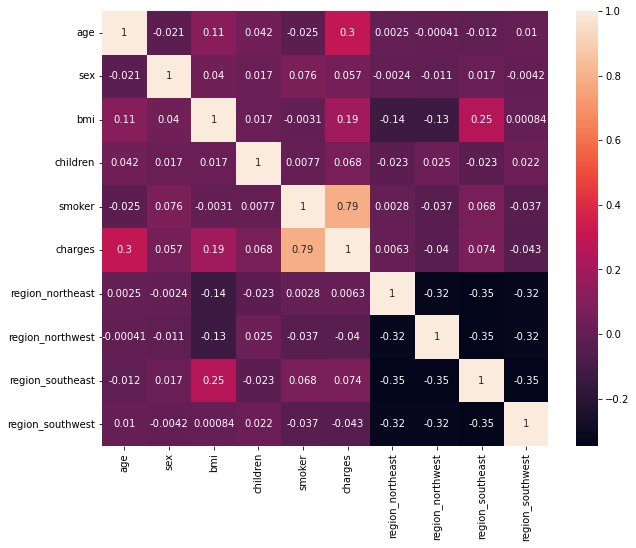

In [67]:
plt.figure(figsize=(10,8))
sns.heatmap(df_main.corr(),annot =True)

In [68]:
df_main.corr().charges.sort_values(ascending=False)

charges             1.000000
smoker              0.787251
age                 0.299008
bmi                 0.190312
region_southeast    0.073982
children            0.067998
sex                 0.057292
region_northeast    0.006349
region_northwest   -0.039905
region_southwest   -0.043210
Name: charges, dtype: float64

### splitting variables - target and independent variables

In [69]:
# x(independent) and y(dependent) split

In [70]:
y = df_main['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [71]:
x = df_main.drop(columns = ['charges'], axis=1)
x

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,0,1
1,18,1,33.770,1,0,0,0,1,0
2,28,1,33.000,3,0,0,0,1,0
3,33,1,22.705,0,0,0,1,0,0
4,32,1,28.880,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,0,1,0,0
1334,18,0,31.920,0,0,1,0,0,0
1335,18,0,36.850,0,0,0,0,1,0
1336,21,0,25.800,0,0,0,0,0,1


#### scaling of independent variables

In [72]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
#range [0,1]

In [73]:
X_scaled = pd.DataFrame(scale.fit_transform(x), columns=x.columns)
X_scaled.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,0.021739,0.0,0.387788,0.0,1.0,0.0,0.0,0.0,1.0
1,0.000000,1.0,0.578435,0.2,0.0,0.0,0.0,1.0,0.0
2,0.217391,1.0,0.553426,0.6,0.0,0.0,0.0,1.0,0.0
3,0.326087,1.0,0.219065,0.0,0.0,0.0,1.0,0.0,0.0
4,0.304348,1.0,0.419617,0.0,0.0,0.0,1.0,0.0,0.0


### Train Test Split

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=0)

In [75]:
X_train.shape

(936, 9)

In [76]:
X_test.shape

(402, 9)

In [77]:
Y_train.shape

(936,)

In [78]:
Y_test.shape

(402,)

In [79]:
X_train.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
1163,0.000000,0.0,0.398019,0.0,0.0,1.0,0.0,0.0,0.0
196,0.456522,0.0,0.546931,0.0,0.0,0.0,0.0,0.0,1.0
438,0.739130,0.0,1.000000,1.0,0.0,0.0,0.0,1.0,0.0
183,0.565217,0.0,0.339396,0.0,0.0,0.0,1.0,0.0,0.0
1298,0.326087,1.0,0.373335,0.4,0.0,0.0,1.0,0.0,0.0


In [80]:
X_test.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
578,0.739130,1.0,0.462488,0.2,0.0,0.0,0.0,0.0,1.0
610,0.630435,0.0,0.435531,0.2,0.0,0.0,0.0,1.0,0.0
569,0.652174,1.0,0.799123,0.4,1.0,0.0,1.0,0.0,0.0
1034,0.934783,1.0,0.728158,0.0,0.0,0.0,1.0,0.0,0.0
198,0.717391,0.0,0.067879,0.0,0.0,0.0,1.0,0.0,0.0
